In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [6]:
# tfds.load returns a tf.data.Dataset object and a tf.core.DatasetInfo object. The latter contains info about how the set is split 
# into test and train, number of examples and names of features
dataset, metadata = tfds.load('cifar10', as_supervised=True, with_info=True) 
train_dataset, test_dataset = dataset['train'], dataset['test']

In [7]:
# Size of training and test sets
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(train_size))
print("Number of test examples:     {}".format(test_size))
# Normalise data
def minmaxScaling(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(minmaxScaling)
test_dataset = test_dataset.map(minmaxScaling)

Number of training examples: 50000
Number of test examples:     10000


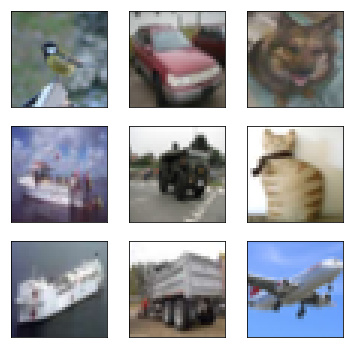

In [8]:

# Human readable labels for the classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']

# Print example and its predicted class
plt.figure(figsize=(6,6))
i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(3,3,i+1)
    plt.imshow(image)#, cmap= plt.cm.binary)
    plt.xlabel(class_names[label], color="white")
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(32,32,3), data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation=('softmax'))
])
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40970     
Total params: 60,362
Trainable params: 60,362
Non-trainable params: 0
__________________________________________________

In [6]:
# Shuffling and splitting of training set 
BATCH_SIZE = 32
train_dataset_batched = train_dataset.repeat().shuffle(train_size).batch(BATCH_SIZE)

In [7]:
# Training model
model.fit(train_dataset_batched, epochs=3, verbose=True, steps_per_epoch=np.ceil(train_size/BATCH_SIZE))

Epoch 1/3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1563/1563 [==============================] - 137s 87ms/step - loss: 1.4152 - accuracy: 0.5056
Epoch 2/3
1563/1563 [==============================] - 129s 83ms/step - loss: 1.1211 - accuracy: 0.6129
Epoch 3/3
1563/1563 [==============================] - 137s 87ms/step - loss: 1.0094 - accuracy: 0.6543


In [4]:
# Performance on test set
test_loss, test_acc = model.evaluate(test_dataset.batch(BATCH_SIZE), steps=np.ceil(test_size/BATCH_SIZE))

NameError: name 'model' is not defined

In [9]:
#Predictions
test_predictions = model.predict(test_dataset.batch(BATCH_SIZE))
train_predictions = model.predict(train_dataset.batch(BATCH_SIZE), steps=np.ceil(train_size/BATCH_SIZE))

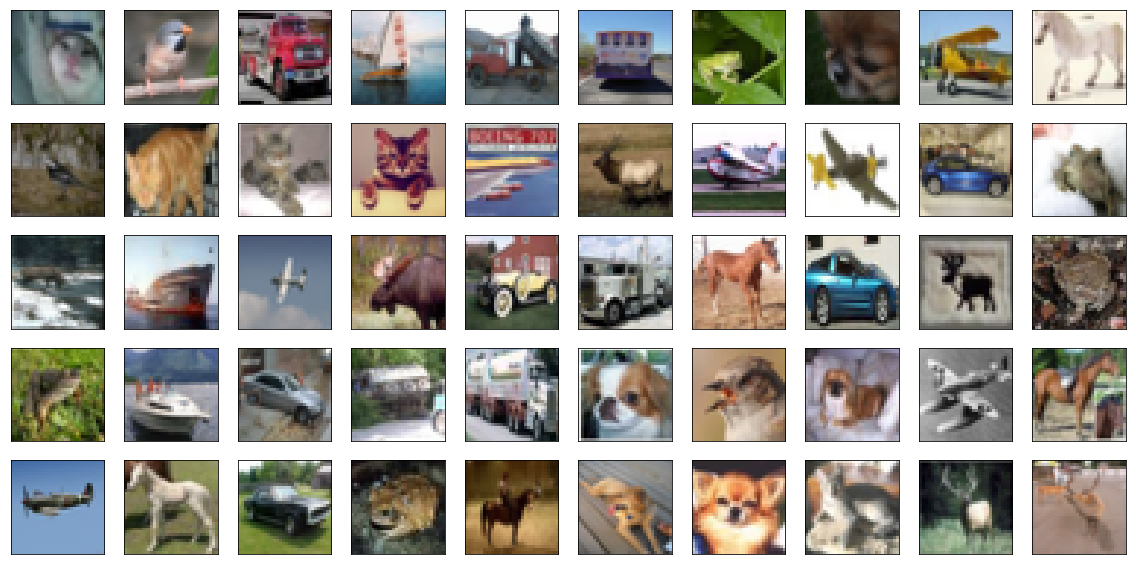

In [11]:
# Print example and its predicted class
plt.figure(figsize=(20,10))
i = 0
for (image, label) in train_dataset.take(50):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(5,10,i+1)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((class_names[label], 
                class_names[train_predictions[i].argmax()]), color='white')
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [ ]:
print(predictions)